<a href="https://colab.research.google.com/github/nyamskamau/Hypothyroid-Prediction-Dataset/blob/main/Independent_Project_Week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Independent Project Week 8.

### 1.Defining the Question.

>*  The data collected focused on Thyroid patients. Therefore based on the dataset at hand I would like to:
     * Build a model that determines whether or not the      patient's symptoms indicate that the patient has hypothyroid.  

### 2.Metric For Success

>* As the researcher my metric for success would be to achieve an accuracy score of 0.97% with my model.

### 3.The Context
> * Nairobi Hospital conducted a clinical camp to test for hypothyroidism.
>* They would like to predict whether a patient has Hypothyroidism given the information at hand.

### 4.Experimental Design Taken.
>* This first step of this analysis will be loading the dataset , the appropriate libraries and then taking the necessary steps to clean the data and deal with any missing entries.
>* Next I will carry out Univariate and Bivariate data analysis while dealing with the outliers found within my dataset,
>* Finally I will 
    * build my models and  
    * evaluate their performance on the dataset at hand  
    * provide observations and recommendations on the suitability of each of the tested models on their appropriateness of solving the given problem.

### 5.The appropriateness of the available data to answer the given question
>* Given the task at hand , the dataset provided was appropriate for this analysis.

## 1.Loading the Dataset and Libraries.

>* The first step of my analysis was loading in the appropriate libraries used in the analysis, along with my dataset.
>* I then previewed my dataset and obtained information for the columns in the dataset.

In [156]:
# Loading my libraries
import pandas as pd 
import numpy as np
import seaborn as sns;sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC , LinearSVC
from sklearn import metrics
from sklearn.metrics import accuracy_score ,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV

In [157]:
# Importing the Dataset
data = pd.read_csv('hypothyroid.csv')


>* Previewing the Dataset and Obtaining information about the datatypes of the columns in the Dataset.

In [158]:
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [159]:
data.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [160]:
data.shape

(3163, 26)

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

>* The dataset had 26 columns and 3163 rows all of the same datatype.

## 1.2.Data Cleaning

>* The first step I undertook in my cleaning was replacing the '?' value in the columns with an null entry so I could count the number of null entries in the dataset.
>* I also replaced the '?' in the sex column with Male.

In [162]:
data.sex.replace({'?':'M'},inplace=True)

In [163]:
data.replace({"?":np.NAN},inplace=True)
data.isnull().sum()

status                          0
age                           446
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

The TBG column had very many missing entries hence I dropped it from the dataset.

In [164]:
data.drop('TBG', axis=1,inplace=True)

>* Then I encoded my Categorical columns with the OneHotEncoder.

In [165]:
categorical_cols = ['status','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid',
'pregnant','sick','tumor','lithium','goitre','TSH_measured','T3_measured','TT4_measured','FTI_measured','T4U_measured','TBG_measured']

In [166]:
data[categorical_cols] = pd.get_dummies(data[categorical_cols], drop_first=True)

>* I then converted the remaining columns into type numeric and then filled the missing/null entries with the mean value of the respective columns.

In [167]:
num = ['TSH','T3','TT4','T4U','FTI','age']
data[num] =data[num].apply(pd.to_numeric, errors='coerce')

>* Replacing the null entries with the mean of the columns and checking whether there are any null entries.

In [168]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(data[['TSH','T3','TT4','T4U','FTI','age']])
data[['TSH','T3','TT4','T4U','FTI','age']] = imputer.transform(data[['TSH','T3','TT4','T4U','FTI','age']])

In [169]:
data.isnull().sum().sum()

0

In [170]:
data.dtypes

status                         uint8
age                          float64
sex                            uint8
on_thyroxine                   uint8
query_on_thyroxine             uint8
on_antithyroid_medication      uint8
thyroid_surgery                uint8
query_hypothyroid              uint8
query_hyperthyroid             uint8
pregnant                       uint8
sick                           uint8
tumor                          uint8
lithium                        uint8
goitre                         uint8
TSH_measured                   uint8
TSH                          float64
T3_measured                    uint8
T3                           float64
TT4_measured                   uint8
TT4                          float64
T4U_measured                   uint8
T4U                          float64
FTI_measured                   uint8
FTI                          float64
TBG_measured                   uint8
dtype: object

## 1.3.Exploring the Data


### 1.3.1.Univariate Analysis.

>* Next I carried out EDA on the columns in my dataset

In [ ]:
data.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,0.952261,51.154214,0.310149,0.145748,0.017389,0.013279,0.032880,0.076193,0.076826,0.019918,0.031299,0.012646,0.000632,0.031299,0.852039,5.923180,0.780272,1.939749,0.921277,108.850000,0.921593,0.978199,0.921910,115.397771,0.082200
std,0.213248,17.881969,0.462627,0.352909,0.130735,0.114483,0.178351,0.265349,0.266357,0.139740,0.174153,0.111760,0.025142,0.174153,0.355117,22.060029,0.414128,0.880441,0.269348,43.657766,0.268853,0.217513,0.268356,57.838927,0.274713
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.500000,1.000000,85.000000,1.000000,0.860000,1.000000,92.000000,0.000000
50%,1.000000,51.154214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.939749,1.000000,107.000000,1.000000,0.978199,1.000000,110.000000,0.000000
75%,1.000000,64.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.923180,1.000000,2.200000,1.000000,124.000000,1.000000,1.050000,1.000000,126.000000,0.000000
max,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,1.000000,10.200000,1.000000,450.000000,1.000000,2.210000,1.000000,881.000000,1.000000


>* I plotted histograms for the continious variables in my dataset.

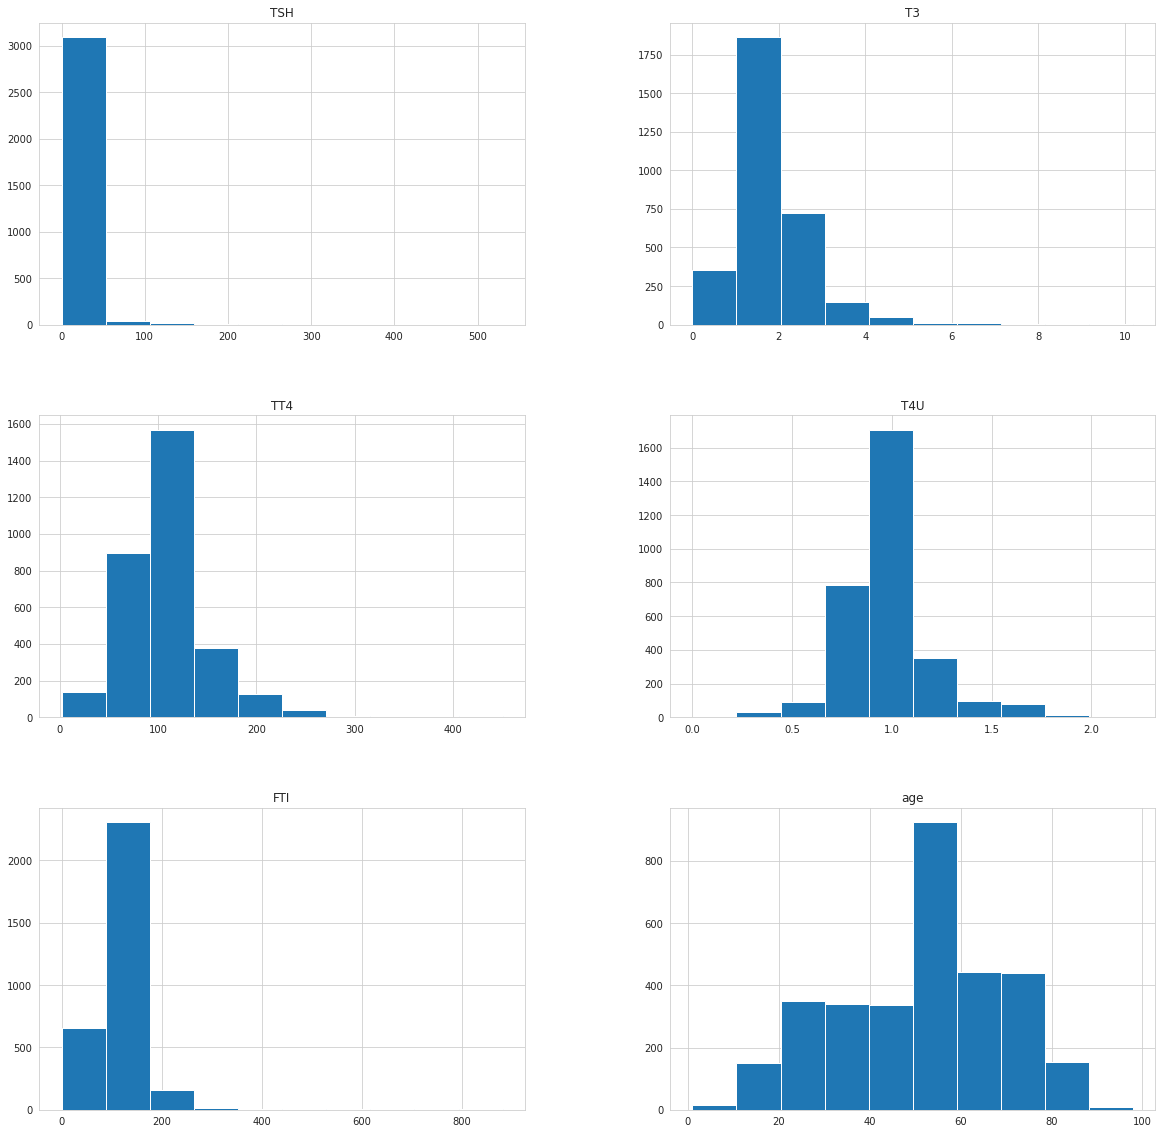

In [16]:
num = ['TSH','T3','TT4','T4U','FTI','age']
data[num].hist(figsize=(20,20))


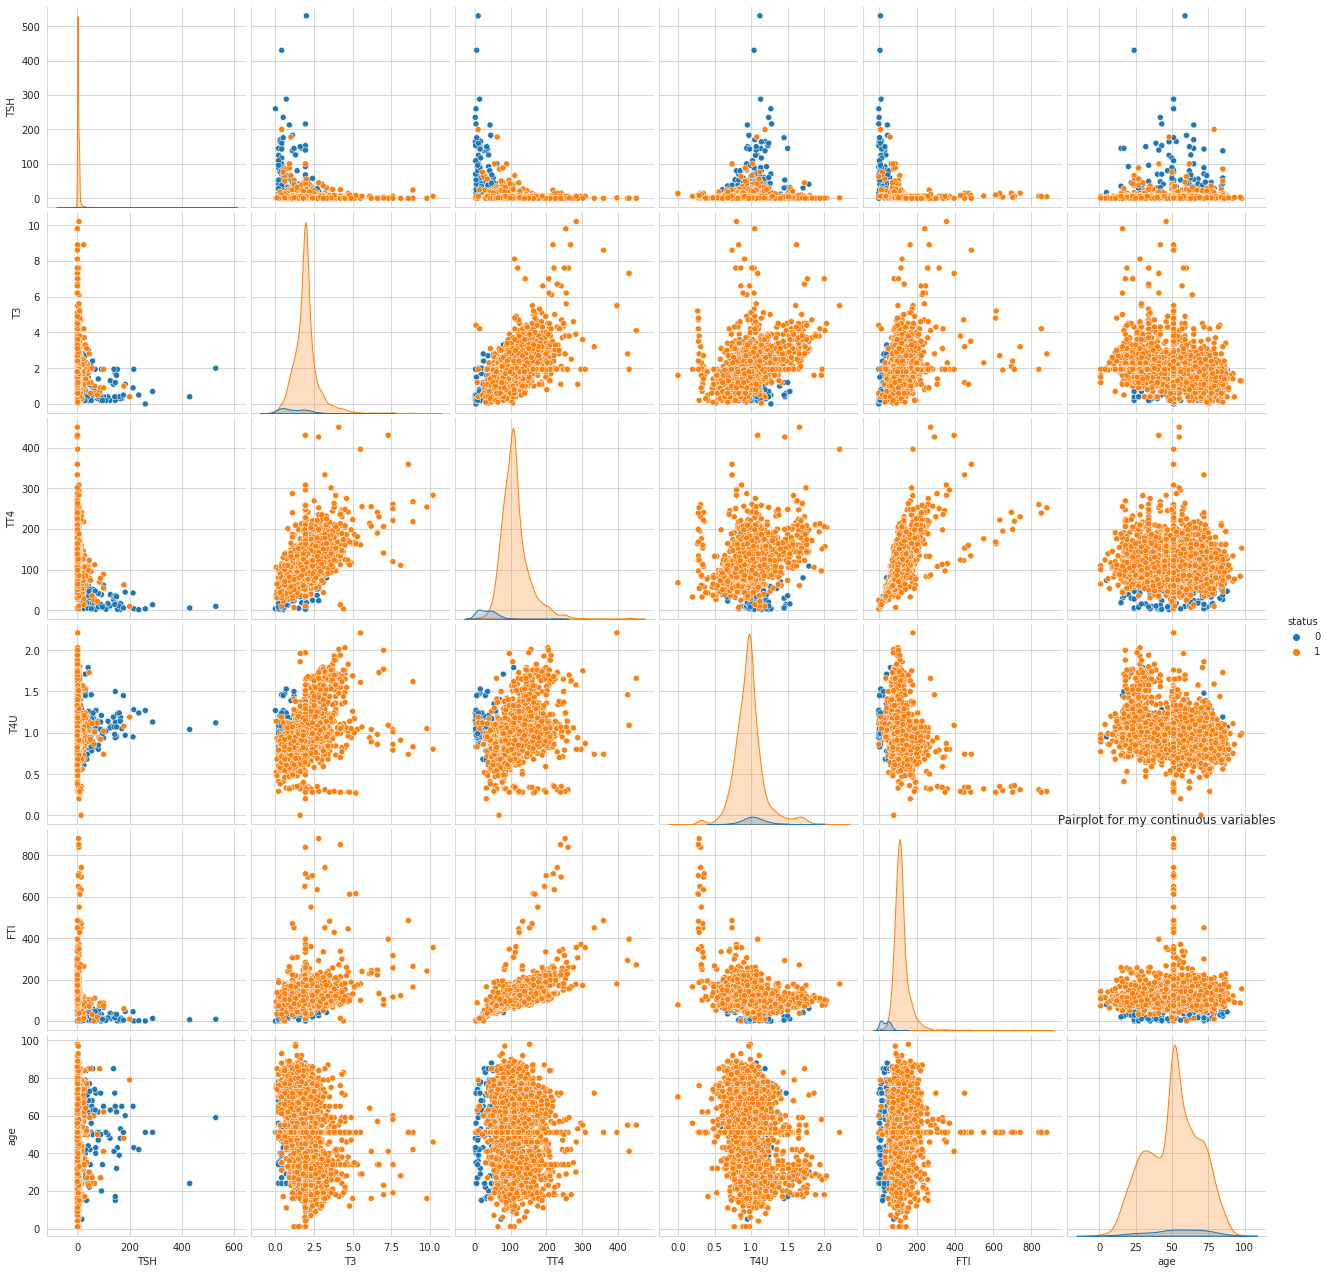

In [19]:
sns.pairplot(data[['TSH','T3','TT4','T4U','FTI','age','status']], hue="status", height=3);
plt.title("Pairplot for my continuous variables")
plt.show()

>* I also checked for the outliers in these columns.

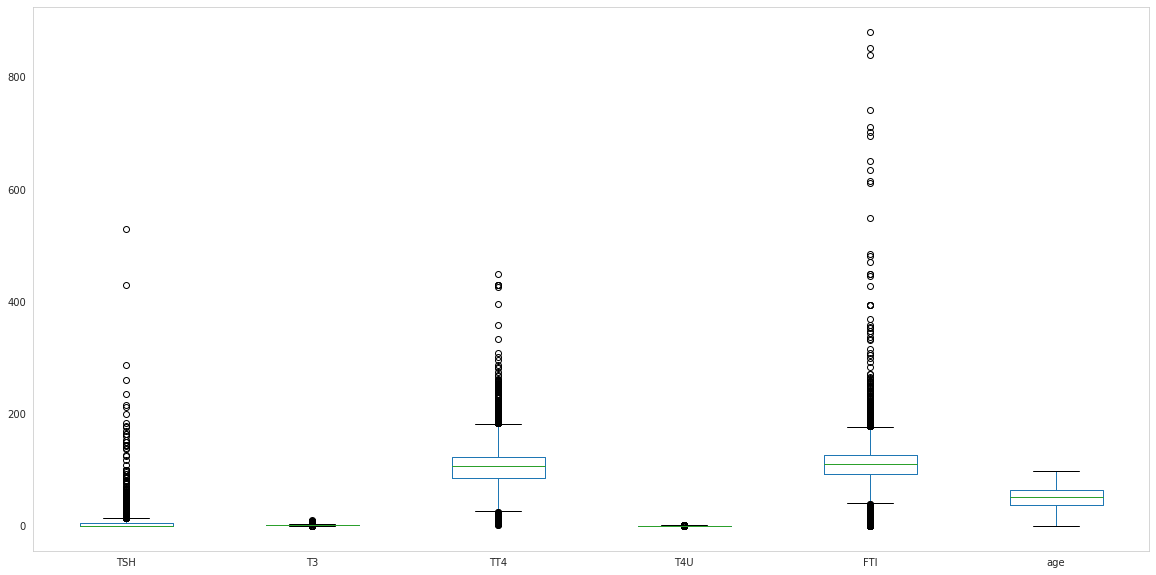

In [43]:
num = ['TSH','T3','TT4','T4U','FTI','age']
data[num].boxplot(grid=False,figsize=(20,10))


>* The dataset had many outliers but I opted not to remove them.

#### Plotting Count Plots for the Categorical Features

Text(0.5, 1.0, 'Status Countplot')

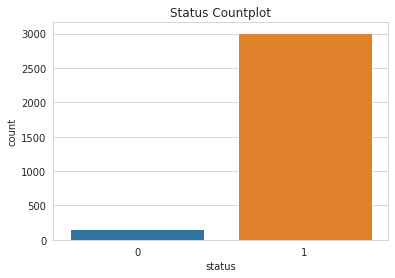

In [127]:
sns.countplot(x = data['status'])
plt.title('Status Countplot')

Text(0.5, 1.0, 'Sex Countplot')

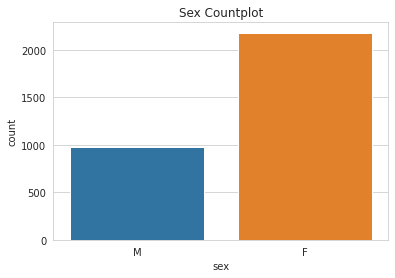

In [59]:
sns.countplot(x = data['sex'])
plt.title('Sex Countplot')

Text(0.5, 1.0, 'On_Thyroxine Countplot')

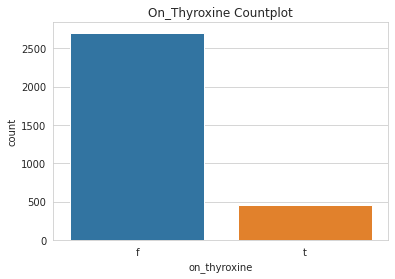

In [60]:
sns.countplot(x = data['on_thyroxine'])
plt.title('On_Thyroxine Countplot')

Text(0.5, 1.0, 'On Antithyroid Medication')

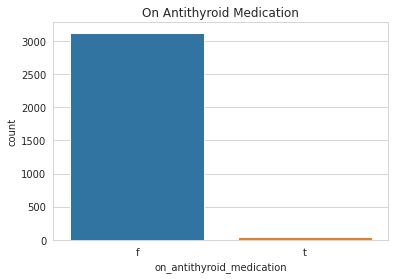

In [62]:
sns.countplot(x = data['on_antithyroid_medication'])
plt.title('On Antithyroid Medication')

Text(0.5, 1.0, 'Thyroid Surgery Countplot')

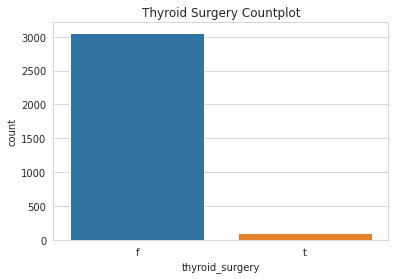

In [63]:
sns.countplot(x = data['thyroid_surgery'])
plt.title("Thyroid Surgery Countplot")

Text(0.5, 1.0, 'Query Hypothyroid Countplot')

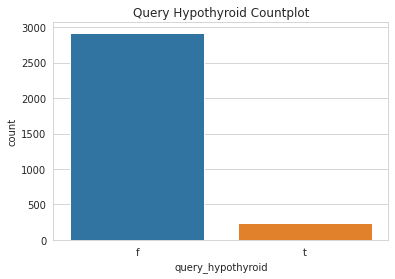

In [64]:
sns.countplot(x = data['query_hypothyroid'])
plt.title('Query Hypothyroid Countplot')

Text(0.5, 1.0, 'Pregnant Countplot')

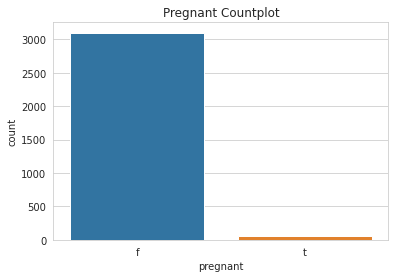

In [65]:
sns.countplot(x = data['pregnant'])
plt.title("Pregnant Countplot")

Text(0.5, 1.0, 'Sick Countplot')

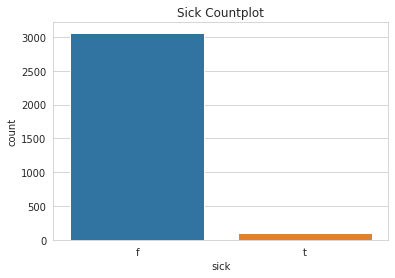

In [66]:
sns.countplot(x=data['sick'])
plt.title("Sick Countplot")

Text(0.5, 1.0, 'Tumor Countplot.')

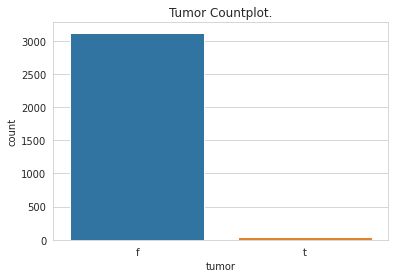

In [67]:
sns.countplot(x = data.tumor)
plt.title("Tumor Countplot.")

Text(0.5, 1.0, 'Lithium Countplot')

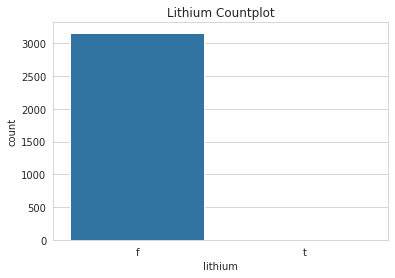

In [68]:
sns.countplot(x = data.lithium)
plt.title("Lithium Countplot")

Text(0.5, 1.0, 'Goitre Countplot')

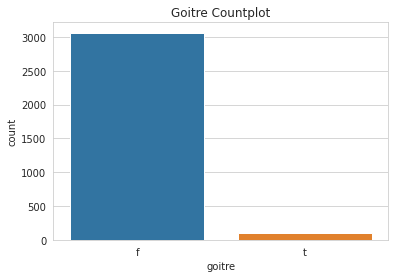

In [69]:
sns.countplot(x = data.goitre)
plt.title("Goitre Countplot")

Text(0.5, 1.0, 'TSH Measured Countplot')

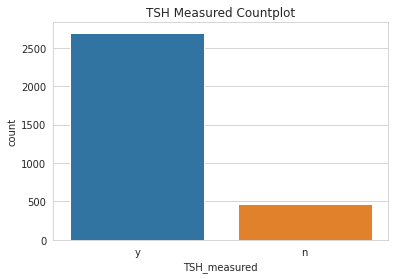

In [70]:
sns.countplot(x=data.TSH_measured)
plt.title('TSH Measured Countplot')

Text(0.5, 1.0, 'T3_Measured Countplot')

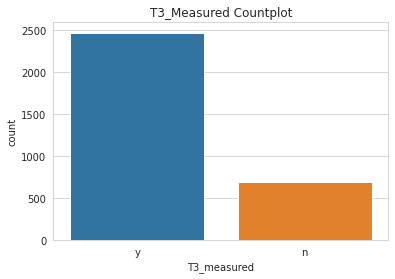

In [71]:
sns.countplot(x=data.T3_measured)
plt.title('T3_Measured Countplot')

Text(0.5, 1.0, 'TT4_Measured Countplot')

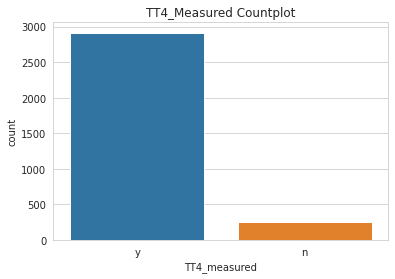

In [72]:
sns.countplot(x=data.TT4_measured)
plt.title("TT4_Measured Countplot")

Text(0.5, 1.0, 'T4U_Measured Countplot')

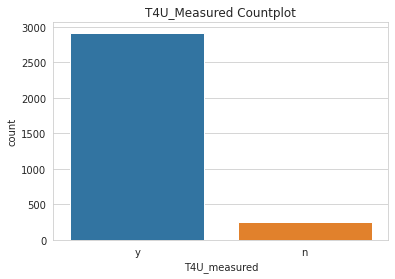

In [73]:
sns.countplot(x=data.T4U_measured)
plt.title('T4U_Measured Countplot')

Text(0.5, 1.0, 'FTI_Measured Countplot')

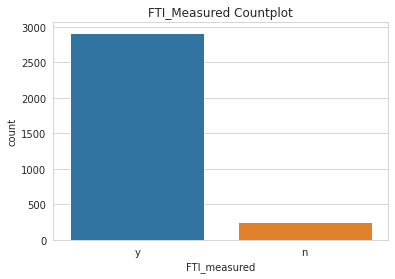

In [74]:
sns.countplot(x=data.FTI_measured)
plt.title('FTI_Measured Countplot')

Text(0.5, 1.0, 'TBG_Measured Countplot')

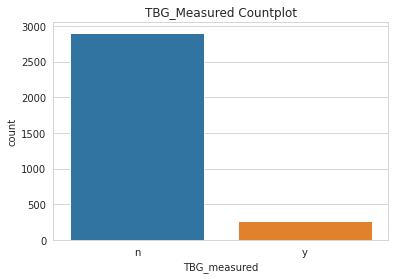

In [75]:
sns.countplot(x=data.TBG_measured)
plt.title('TBG_Measured Countplot')

>* From my countplots I deduced that the dataset was heavily imbalanced.
>* Many of the patients in the clinical camp did not exhibit symptoms of hypothyrodism.
>* Furthermore the Lithium column had no true entries, it was therefore pointless so I dropped it from the dataset.

In [171]:
data.drop('lithium',axis=1,inplace=True)

### Bivariate Analysis

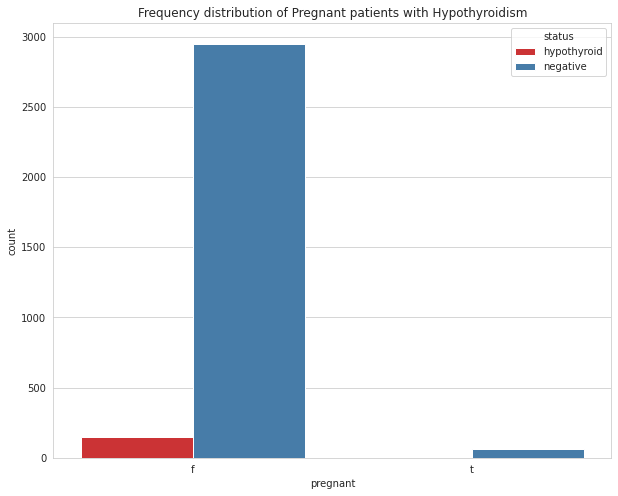

In [105]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="pregnant", hue="status", data=data, palette="Set1")
ax.set_title("Frequency distribution of Pregnant patients with Hypothyroidism")
plt.show()

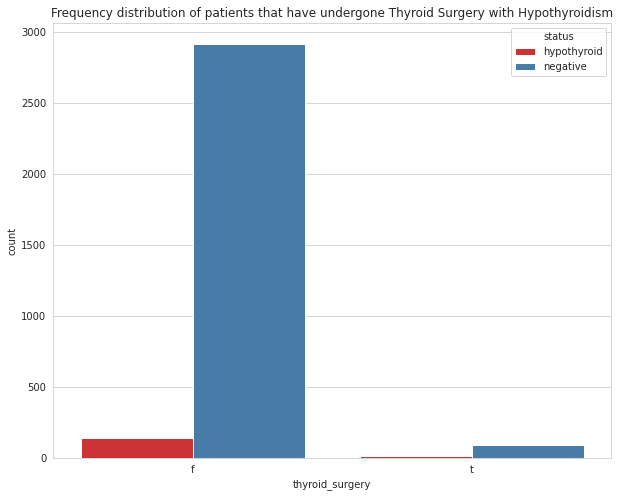

In [106]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="thyroid_surgery", hue="status", data=data, palette="Set1")
ax.set_title("Frequency distribution of patients that have undergone Thyroid Surgery with Hypothyroidism")
plt.show()

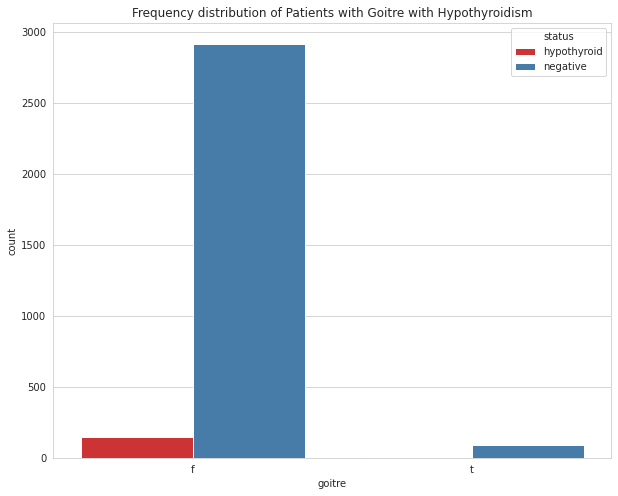

In [107]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="goitre", hue="status", data=data, palette="Set1")
ax.set_title("Frequency distribution of Patients with Goitre with Hypothyroidism")
plt.show()

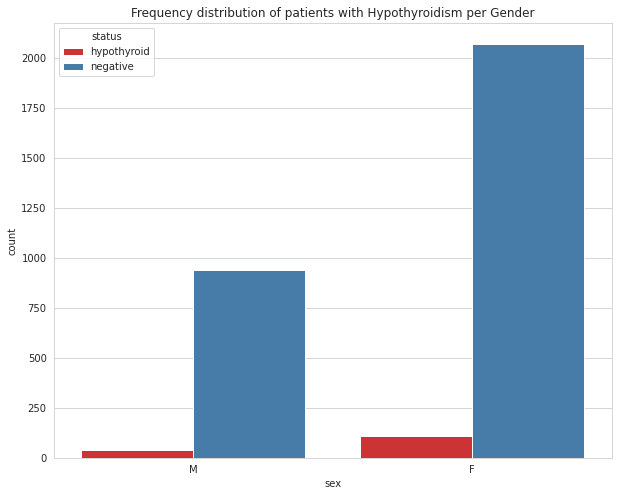

In [108]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="sex", hue="status", data=data, palette="Set1")
ax.set_title("Frequency distribution of patients with Hypothyroidism per Gender")
plt.show()

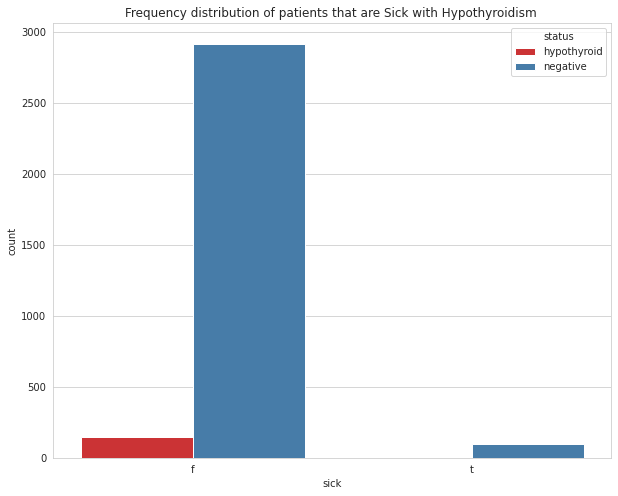

In [109]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="sick", hue="status", data=data, palette="Set1")
ax.set_title("Frequency distribution of patients that are Sick with Hypothyroidism ")
plt.show()

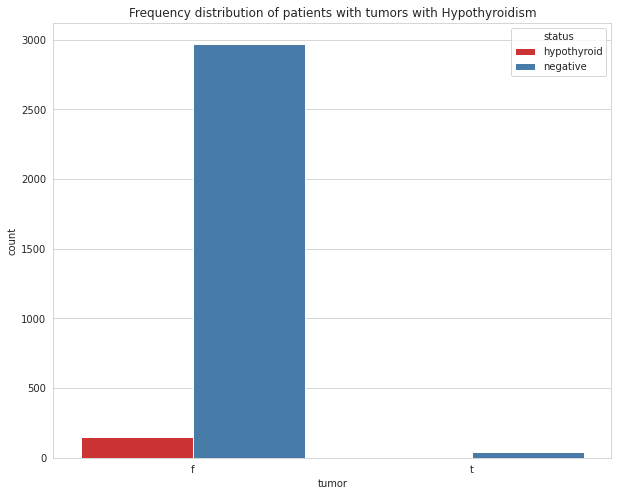

In [110]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="tumor", hue="status", data=data, palette="Set1")
ax.set_title("Frequency distribution of patients with tumors with Hypothyroidism")
plt.show()

## Selecting my Features and Target Variable

In [172]:
X = data.drop('status',axis=1)
y = data.status
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Dealing with my imbalanced dataset by upsampling the minority class.

In [173]:
from sklearn.utils import resample
#combine them back for resampling
train_data = pd.concat([X_train, y_train], axis=1)
# separate minority and majority classes
negative = train_data[train_data.status==1]
positive = train_data[train_data.status==0]
# upsample minority
pos_upsampled = resample(positive,
 replace=True, # sample with replacement
 n_samples=len(negative), # match number in majority class
 random_state=27) # reproducible results
# combine majority and upsampled minority
upsampled = pd.concat([negative, pos_upsampled])
# check new class counts
upsampled.status.value_counts()

1    2405
0    2405
Name: status, dtype: int64

## 2.1.DecisionTreeClassifier Model

The first model I built was a Decision Tree Model.

In [174]:
# Fitting a DecisionTreeClassfier Model
dtc = DecisionTreeClassifier()
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test,y_pred))

Accuracy Score: 0.9794628751974723


>* I then tuned the Parameters of my model with a GridSearch.

In [175]:
# Defining the Parameter Range
param_dist = {"max_depth": [3,5,6, None],
              "max_features": [1,2,3,4,5,6,7,8,9,10],
              "min_samples_leaf": [1,2,3,4,5,6,7],
              "criterion": ["gini", "entropy"]}

grid = GridSearchCV(estimator=dtc,param_grid=param_dist,cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [176]:
#Obtaining the best parameters of my model
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 10, 'min_samples_leaf': 4}


In [219]:
# Fitting the hyperparameters to my model.
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=6,max_features=10,min_samples_leaf=4)
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

In [220]:
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))

Accuracy Score: 0.9842022116903634
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        26
           1       1.00      0.99      0.99       607

    accuracy                           0.98       633
   macro avg       0.88      0.94      0.91       633
weighted avg       0.99      0.98      0.98       633

------------------------------------------------------
Confusion Matrix:
[[ 23   3]
 [  7 600]]


>* According to the classificstion report , in class zero for all instances classified positive, 77%  are correct and for class 1 100% were correct.
>* I checked for the important features in my model.

In [179]:
# Obtaining the importance of the Features in my model
feature_scores = pd.Series(dtc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

FTI                          0.792446
TSH                          0.126968
TT4                          0.050678
T4U                          0.018757
T3                           0.007214
age                          0.003938
pregnant                     0.000000
sex                          0.000000
on_thyroxine                 0.000000
query_on_thyroxine           0.000000
on_antithyroid_medication    0.000000
thyroid_surgery              0.000000
query_hypothyroid            0.000000
query_hyperthyroid           0.000000
TBG_measured                 0.000000
sick                         0.000000
tumor                        0.000000
TSH_measured                 0.000000
T3_measured                  0.000000
TT4_measured                 0.000000
T4U_measured                 0.000000
FTI_measured                 0.000000
goitre                       0.000000
dtype: float64

>* The important features of my DecisionTree were FTI and TSH

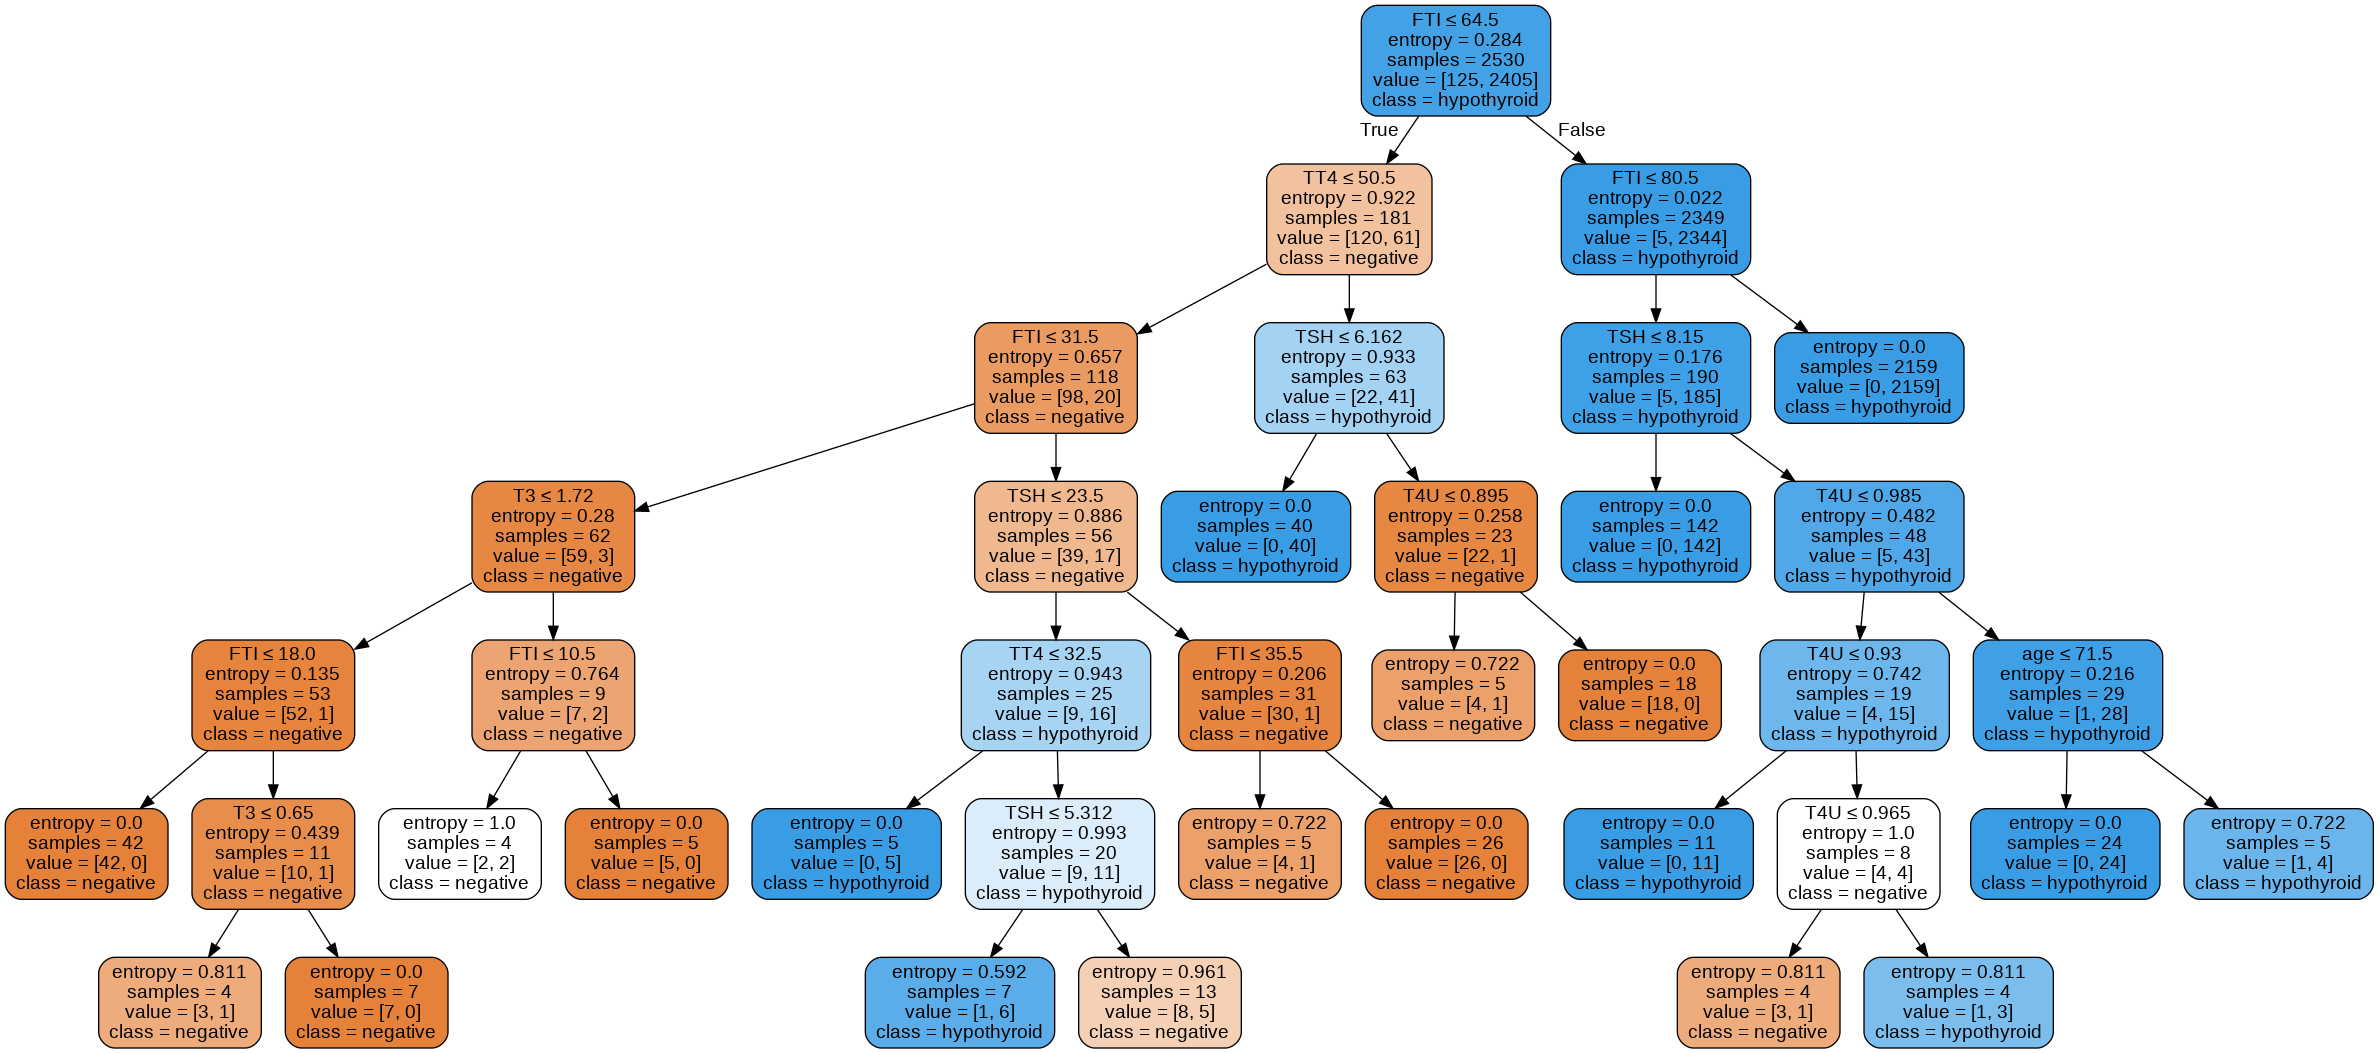

In [181]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import io

dot_data = io.StringIO()

#dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['negative', 'hypothyroid'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Thyroid.png')
Image(graph.create_png())

## 2.2.RandomForestClassifier Model

I fit a random forest model on the data .

First I defined the  model then tuned the hyperparameters using a Randomized Search.

In [183]:
# Fitting a RandomForestClassifier Model
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train,y_train)
y_predicted = rfc.predict(X_test) 
print(classification_report(y_test,y_predicted))
print("Accuracy Score:", accuracy_score(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79        26
           1       0.99      0.99      0.99       607

    accuracy                           0.98       633
   macro avg       0.88      0.90      0.89       633
weighted avg       0.98      0.98      0.98       633

Accuracy Score: 0.9826224328593997


>* I then tuned the Hyperparameters for the model using the RandomizedSearch.

In [ ]:
# Create the random grid
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True,False]}

grid = RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,cv=10)
grid.fit(X_train,y_train)

In [185]:
# print best parameter after tuning 
grid.best_params_  

{'bootstrap': False,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1400}

In [186]:
# Fitting the Hyperparameters to my model.
rfc = RandomForestClassifier(n_estimators =1400, min_samples_split= 5, min_samples_leaf= 2, max_features='auto', max_depth= 90, bootstrap=False)
rfc = rfc.fit(X_train,y_train)
y_predicted = rfc.predict(X_test) 

In [187]:
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))

Accuracy Score: 0.9842022116903634
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        26
           1       1.00      0.99      0.99       607

    accuracy                           0.98       633
   macro avg       0.88      0.94      0.91       633
weighted avg       0.99      0.98      0.98       633

------------------------------------------------------
Confusion Matrix:
[[ 23   3]
 [  7 600]]


>* According to the classificstion report , in class zero for all instances classified positive, 88%  are correct and for class 1 99% were correct.

>* I then checked the importance of the features in my model.

In [188]:
# Obtaining the Feature Importance
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

FTI                          0.321659
TT4                          0.279210
TSH                          0.261617
T3                           0.053053
T4U                          0.031686
age                          0.020235
on_antithyroid_medication    0.006550
TSH_measured                 0.005752
on_thyroxine                 0.004336
query_hypothyroid            0.003904
sex                          0.002732
thyroid_surgery              0.002263
T3_measured                  0.002029
sick                         0.001543
TBG_measured                 0.001038
goitre                       0.000957
query_hyperthyroid           0.000640
TT4_measured                 0.000262
T4U_measured                 0.000250
FTI_measured                 0.000203
pregnant                     0.000038
tumor                        0.000030
query_on_thyroxine           0.000013
dtype: float64

>* The FTI , TSH and TT4 were the important features of this model.

## 2.3.AdaBoostClassifier Model

I fit a baseline AdaBoostClassifier Model on my dataset then tuned the Hyperparameters using a GridSearch

In [193]:
# Fitting an AdaBoostClassifier Model
abc = AdaBoostClassifier()
abc = abc.fit(X_train,y_train)
y_prediction = abc.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test,y_prediction))

Accuracy Score: 0.9889415481832543


In [ ]:
# Defining the Parameter range
param_dist = {
 'n_estimators': [50, 100,150,200,250,300],
 'learning_rate' : [0.001,0.01,0.05,0.1,0.3,1],
 'random_state': [None,20,40,60,100]
 }

grid = GridSearchCV(estimator=abc, param_grid = param_dist,cv=10, refit = True, verbose = 3)
# Fitting the Model
grid.fit(X_train, y_train)

>* After obtaining my hyperparameters I fit them into the model.

In [191]:
# Obtaining the best parameters of my GridSearch
grid.best_params_

{'learning_rate': 0.01, 'n_estimators': 150, 'random_state': None}

In [217]:
# Fitting the Hyperparameters to my model
abc = AdaBoostClassifier(n_estimators=150,learning_rate=0.01)
abc = abc.fit(X_train,y_train)
y_pred= abc.predict(X_test)


In [218]:
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))

Accuracy Score: 0.9873617693522907
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        26
           1       1.00      0.99      0.99       607

    accuracy                           0.99       633
   macro avg       0.91      0.94      0.92       633
weighted avg       0.99      0.99      0.99       633

------------------------------------------------------
Confusion Matrix:
[[ 23   3]
 [  5 602]]


>* According to the classificstion report , in class zero for all instances classified positive, 82%  are correct and for class 1 100% were correct.

In [196]:
# Obtaining the Feature Importance
feature_scores = pd.Series(abc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

TSH                          0.5
FTI                          0.5
TBG_measured                 0.0
sick                         0.0
sex                          0.0
on_thyroxine                 0.0
query_on_thyroxine           0.0
on_antithyroid_medication    0.0
thyroid_surgery              0.0
query_hypothyroid            0.0
query_hyperthyroid           0.0
pregnant                     0.0
goitre                       0.0
tumor                        0.0
TSH_measured                 0.0
T3_measured                  0.0
T3                           0.0
TT4_measured                 0.0
TT4                          0.0
T4U_measured                 0.0
T4U                          0.0
FTI_measured                 0.0
age                          0.0
dtype: float64

>* The important features were the FTI and TSH

## 2.4.GradientBoostingClassifier Model

>* I first fit a model and obtained the accuracy score.

In [197]:
# Fitting a GradientBoostingClassifier Model.
gbc = GradientBoostingClassifier()
gbc = gbc.fit(X_train,y_train)
y_predd = gbc.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test,y_predd))

Accuracy Score: 0.9842022116903634


>* I then tuned my Hyperparameters using a RandomizedSearch

In [ ]:
# Defining the Parameter Range
parameters = {
    "n_estimators":[5,50,100,150,200,250,300,350,400,450,500],
    "max_depth":[1,2,3,4,5,6,7,8,9],
    "learning_rate":[0.001,0.0025,0.01,0.025,0.05,0.1,1],
    'max_features': [None,2,3,4,5,6,7,8,9,10]
}

grid = RandomizedSearchCV(estimator=gbc,param_distributions=parameters,cv=10,refit=True)
#Fitting my model
grid.fit(X_train,y_train)

In [209]:
# Obtaining the best parameters of my model
grid.best_params_

{'learning_rate': 0.025,
 'max_depth': 6,
 'max_features': 6,
 'n_estimators': 200}

In [213]:
# Fitting the Hyperparameters to my GradientBoostingClassifier model
gbc = GradientBoostingClassifier(learning_rate=0.025,n_estimators=200,max_depth=6,max_features=6)
gbc = gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)

Accuracy Score: 0.985781990521327


In [214]:
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))

Accuracy Score: 0.985781990521327
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.79      0.88      0.84        26
           1       1.00      0.99      0.99       607

    accuracy                           0.99       633
   macro avg       0.89      0.94      0.91       633
weighted avg       0.99      0.99      0.99       633

------------------------------------------------------
Confusion Matrix:
[[ 23   3]
 [  6 601]]


>* According to the classificstion report , in class zero for all instances classified positive, 79%  are correct and for class 1 100% were correct.

In [221]:
# Obtaining the importance of the features in my model.
feature_scores = pd.Series(gbc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

FTI                          0.329978
TSH                          0.307936
TT4                          0.235795
T3                           0.050444
T4U                          0.024831
age                          0.017047
on_antithyroid_medication    0.010006
on_thyroxine                 0.005574
thyroid_surgery              0.004398
TSH_measured                 0.003898
query_hypothyroid            0.003730
sex                          0.001786
sick                         0.001441
T3_measured                  0.000893
goitre                       0.000733
TBG_measured                 0.000582
TT4_measured                 0.000194
T4U_measured                 0.000185
pregnant                     0.000155
query_on_thyroxine           0.000148
query_hyperthyroid           0.000134
tumor                        0.000061
FTI_measured                 0.000050
dtype: float64

## 3.SUPPORT VECTOR MACHINE MODELS

>* For my SVM models I opted to use the two features with the highest scores in my DecisionTree model ie FTI and TSH.

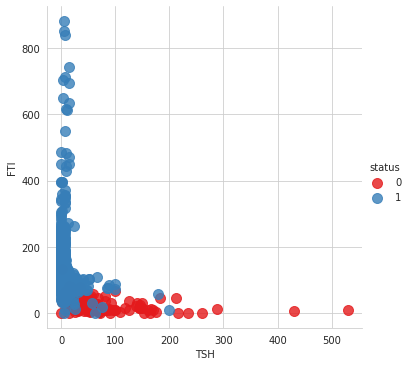

In [222]:
sns.lmplot(x='TSH',y='FTI', data=data, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 100})


In [228]:
X = data[['FTI','TSH']]
y = data.status
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
train_data = pd.concat([X_train, y_train], axis=1)

negative = train_data[train_data.status==1]
positive = train_data[train_data.status==0]

pos_upsampled = resample(positive,
 replace=True, 
 n_samples=len(negative), 
 random_state=27) 

upsampled = pd.concat([negative, pos_upsampled])
upsampled.status.value_counts()

1    2110
0    2110
Name: status, dtype: int64

I then Standardized the values using StandardScaler

In [229]:
# Standardzing my features using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

### 3.1.SVM Linear Kernel

>* I first fit a linear kernel to the SVM model

In [230]:
# Fitting a Linear SVM kernel
svl = SVC(kernel='linear')
svl = svl.fit(X_train,y_train)
y_preddd = svl.predict(X_test)
print('Accuracy Score :' , accuracy_score(y_test,y_preddd))


Accuracy Score : 0.9778714436248683


>* I then tuned my hyperparameters with a GridSearch

In [ ]:
# defining parameter range 
param_grid = {'C': [0.1,0.05, 1,5,7, 10,25 ,50],
              'random_state' : [None,10,20,40,60,100]
}
grid = GridSearchCV(svl, param_grid, refit = True, verbose = 3,cv=10)   
# fitting the model for grid search 
grid.fit(X_train, y_train) 


In [232]:
print("Best Parameters:" , grid.best_params_)

Best Parameters: {'C': 5, 'random_state': None}


In [233]:
# Fitting the Hyperparameters to my model.
svl = SVC(kernel='linear',C=5)
svl = svl.fit(X_train,y_train)
y_preddd = svl.predict(X_test)

Accuracy Score : 0.982086406743941


In [235]:
print("Accuracy Score:", accuracy_score(y_test,y_preddd))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_preddd))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_preddd))

Accuracy Score: 0.982086406743941
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        47
           1       0.99      0.99      0.99       902

    accuracy                           0.98       949
   macro avg       0.93      0.87      0.90       949
weighted avg       0.98      0.98      0.98       949

------------------------------------------------------
Confusion Matrix:
[[ 35  12]
 [  5 897]]


>* According to the classificstion report , in class zero for all instances classified positive, 88%  are correct and for class 1 99% were correct.

### 3.2.SVM Radial Basis Function Kernel.

>* I fit a rbf Kernel to the SVM model

In [236]:
# Fitting an rbf Kernel
svr = SVC(kernel='rbf')
svr = svr.fit(X_train,y_train)
y_preddd = svr.predict(X_test)
print("Accuracy Score:" , accuracy_score(y_test,y_preddd))

Accuracy Score: 0.982086406743941


>* Next I tuned my hyperparameters with a GridSearch

In [ ]:
# defining parameter range 
param_grid = {'C': [0.1, 1,5, 10, 50,100, 1000],  
              'gamma': [10,1, 0.1, 0.01, 0.001, 0.0001], 
              'random_state' : [None,10,20,40,60,100]
              }   
grid = GridSearchCV(svr, param_grid, refit = True, verbose = 3,cv=10)   
# fitting the model for grid search 
grid.fit(X_train, y_train) 


In [242]:
# print best parameter after tuning 
print(grid.best_params_) 

{'C': 1000, 'gamma': 1, 'random_state': None}


In [254]:
# Fitting the Hyperparameters to my model.
svr = SVC(kernel='rbf',gamma=1,C=3000)
svr = svr.fit(X_train,y_train)
y_preddd = svr.predict(X_test)

In [255]:
print("Accuracy Score:", accuracy_score(y_test,y_preddd))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_preddd))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_preddd))

Accuracy Score: 0.9841938883034773
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        47
           1       0.99      0.99      0.99       902

    accuracy                           0.98       949
   macro avg       0.93      0.89      0.91       949
weighted avg       0.98      0.98      0.98       949

------------------------------------------------------
Confusion Matrix:
[[ 37  10]
 [  5 897]]


>* According to the classificstion report , in class zero for all instances classified positive, 88%  are correct and for class 1 99% were correct.

### SVM Polynomial Kernel

>* I fit a Polynomial Kernel and then tuned my Hyperparameters.

In [256]:
#Fitting a Polynomial Kernel.
svp = SVC(kernel='poly')
svp  = svp.fit(X_train,y_train)
y_preddd = svp.predict(X_test)
print("Accuracy Score :" , accuracy_score(y_test,y_preddd))

Accuracy Score : 0.9810326659641728


In [ ]:
# defining parameter range 
param_grid = {'C': [ 1,5,10,20,25,30],  
              'degree':[2,3,4,]
                      }   
grid = GridSearchCV(svp, param_grid, refit = True, verbose = 3,cv=10)   
# fitting the model for grid search 
grid.fit(X_train, y_train) 

In [ ]:
#Print the best hyperparameters of my model
print('Best Parameters:',grid.best_params_)

Best Parameters: {'C': 10, 'degree': 3}


In [261]:
#Fitting the Hyperparametrs to the model.
svp = SVC(kernel='poly',C=10, degree=3)
svp = svp.fit(X_train,y_train)
y_preddd = svp.predict(X_test)

In [262]:
print("Accuracy Score:", accuracy_score(y_test,y_preddd))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_preddd))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_preddd))

Accuracy Score: 0.9810326659641728
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.72      0.79        47
           1       0.99      0.99      0.99       902

    accuracy                           0.98       949
   macro avg       0.93      0.86      0.89       949
weighted avg       0.98      0.98      0.98       949

------------------------------------------------------
Confusion Matrix:
[[ 34  13]
 [  5 897]]


>* According to the classificstion report , in class zero for all instances classified positive, 82%  are correct and for class 1 100% were correct.
>* The model correct classified 75% of true positives in class 0 and 100% in class 1.

### Fitting to my best performing Kernel.

The best performing Kernel was the Radial Basis Function kernel with a precision of 1.0 and 0.99.

Therefore I fit the rest of my features to the rbf kernel

In [276]:
X = data[['TSH','T3' ,'TT4','T4U','FTI']].values
y = data.status.values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
negative = train_data[train_data.status==1]
positive = train_data[train_data.status==0]

pos_upsampled = resample(positive,
 replace=True, 
 n_samples=len(negative), 
 random_state=0) 

upsampled = pd.concat([negative, pos_upsampled])
upsampled.status.value_counts()

1    2110
0    2110
Name: status, dtype: int64

Then I standardized using the Standard Scaler.

In [277]:
# Standardizing the dataset with Standard Scaler.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [278]:
# Fitting an rbf kernel.
svr = SVC(kernel='rbf',gamma=1,C=3000,)
svr = svr.fit(X_train,y_train)
y_preddd = svr.predict(X_test)

Accuracy_score: 0.9715489989462592


In [279]:
print("Accuracy Score:", accuracy_score(y_test,y_preddd))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_preddd))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_preddd))

Accuracy Score: 0.9715489989462592
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.68      0.59      0.63        39
           1       0.98      0.99      0.99       910

    accuracy                           0.97       949
   macro avg       0.83      0.79      0.81       949
weighted avg       0.97      0.97      0.97       949

------------------------------------------------------
Confusion Matrix:
[[ 23  16]
 [ 11 899]]


The model with two fearures performs better than the model with all the features which has a precision of 68% and 97% respectively.

## 4. Recommendation.

The dataset provided was imbalanced, therefore I would reccomend more entries in the dataset to allow the models to better predict instances of Hypothyroidism.